# Plotting and visualizing temperature variations

In lecture we discussed the subsurface temperature response to time-periodic variations in surface temperature of the form
$$
T(0,t) = T_0 + \Delta T \cos(\omega t)
$$
where $T_0$ is the average surface temperature and $\Delta T$ is the amplitude of the periodic fluctuations.

The solution to the heat equation subject to this time-varying boundary condition is
$$
T(z,t) = T_0+\Delta T \exp\left(-z\sqrt{\frac{\omega}{2\kappa}} \right) \cos\left(\omega t - z\sqrt{\frac{\omega}{2\kappa}} \right)
$$

For $\kappa=10^{-6}$ m$^2$/s, make a pseudocolor plot (following the example) showing the effect of **annual** temperature variations with amplitude 10 K.
- Choose temperature and depth limits such that you can see at least a couple of periods (the period is $2\pi/\omega$) and so that your vertical axis extends at least a couple of skin depths below the surface.
- Make sure that the axes and colorbar are labeled with some reasonable units (i.e. not seconds for a plot with several years duration).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

seconds_in_year = 3.15e7  # 3.15*10**7
#PRO TIP: Always use different numbers of elements in different dimensions. If you make a mistake, it will be easier to find by looking at dimensions!
z = np.linspace(0,10.0,100) # list of depth values, in m
t = np.linspace(0,5.0*seconds_in_year,200) # list of t values
# print these out on your own to see what happens:
tt,zz = np.meshgrid(t,z)
T0 = 300.0  # surface temperature, K
dT = 10.0 # Temperature change in model, K
omega = 2 * np.pi / seconds_in_year  # w = 2 * pi / T, s^(-1), T equals 1 year
kappa = 1e-6  # m^2 / s
T = T0 + dT * np.exp(-zz * (omega / (2*kappa))**0.5) * np.cos(omega * tt - zz * (omega / (2*kappa))**0.5)  # Total temperature, K

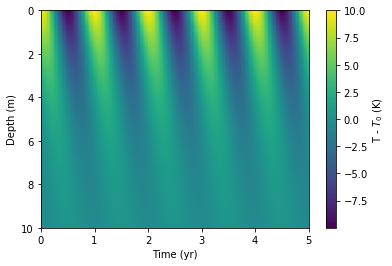

In [4]:
# Plot pcolor figure using pcolormesh
plt.figure()
plt.pcolormesh(tt/seconds_in_year, zz, T - T0)
plt.xlabel('Time (yr)')  # unit for t, year 
plt.ylabel('Depth (m)')  # unit for Depty, m
plt.gca().invert_yaxis() # gca is a function that returns a 'handle' to the current axes
plt.colorbar(label='T - $T_0$ (K)')
plt.show()